# Analysis of the labeled company railway data 2013 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


In [18]:
#read label csv file
data_info_df = pd.read_csv('./data/labeled_ADSMI/labels_int.csv')

In [19]:
data_info_df["Label"].unique()

array(['[Negativ]', '[Kreischen]', '[Kreischen][Quietschen]',
       '[Quietschen]'], dtype=object)

In [20]:
#print entries where label is kreischen
kreischen_df = data_info_df.loc[data_info_df['Label'] == '[Kreischen]']
Negativ_df = data_info_df.loc[data_info_df['Label'] == '[Negativ]']
Quitschen_df = data_info_df.loc[data_info_df['Label'] == '[Quietschen]']
QandK_df = data_info_df.loc[data_info_df['Label'] == '[Kreischen][Quietschen]']

In [23]:
kreischen_df

,Unnamed: 0,filename,Label_int,Label,fold,data_path
1,1,2014-06-04_05-51-13_01.WAV,0,[Kreischen],5,./data/labeled_ADSMI/labeled_data_2013-535/201...
3,3,2014-07-21_01-39-42_01.WAV,0,[Kreischen],6,./data/labeled_ADSMI/labeled_data_2013-535/201...
6,6,2014-06-22_20-07-03_01.WAV,0,[Kreischen],4,./data/labeled_ADSMI/labeled_data_2013-535/201...
8,8,2014-09-17_07-43-51_01.WAV,0,[Kreischen],8,./data/labeled_ADSMI/labeled_data_2013-535/201...
13,13,2014-06-23_10-54-16_01.WAV,0,[Kreischen],6,./data/labeled_ADSMI/labeled_data_2013-535/201...
...,...,...,...,...,...,...
4710,4710,2014-07-24_22-29-37_01.WAV,0,[Kreischen],4,./data/labeled_ADSMI/labeled_data_2013-535/201...
4711,4711,2014-07-15_07-39-46_01.WAV,0,[Kreischen],7,./data/labeled_ADSMI/labeled_data_2013-535/201...
4713,4713,2014-07-09_15-43-12_01.WAV,0,[Kreischen],5,./data/labeled_ADSMI/labeled_data_2013-535/201...
4714,4714,2014-10-02_10-41-34_01.WAV,0,[Kreischen],4,./data/labeled_ADSMI/labeled_data_2013-535/201...


In [28]:
path ="./data/labeled_ADSMI/labeled_data_2013-535"
kreischen_df["data_path"] = path +"/"+ kreischen_df["filename"]
Negativ_df["data_path"] = path +"/"+ Negativ_df["filename"]
Quitschen_df["data_path"] = path +"/"+ Quitschen_df["filename"]
QandK_df["data_path"] = path +"/"+ QandK_df["filename"]



C:\Users\Gabriel\AppData\Local\Temp\ipykernel_28212\3694910115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kreischen_df["data_path"] = path +"/"+ kreischen_df["filename"]
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_28212\3694910115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Negativ_df["data_path"] = path +"/"+ Negativ_df["filename"]
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_28212\3694910115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

<Axes: >

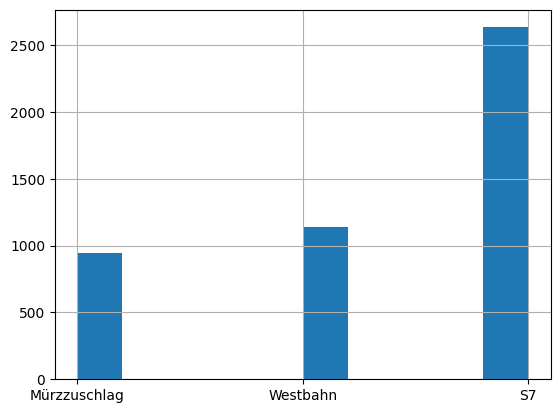

In [20]:
data_info_df["campaign"].hist()


# Label distribution

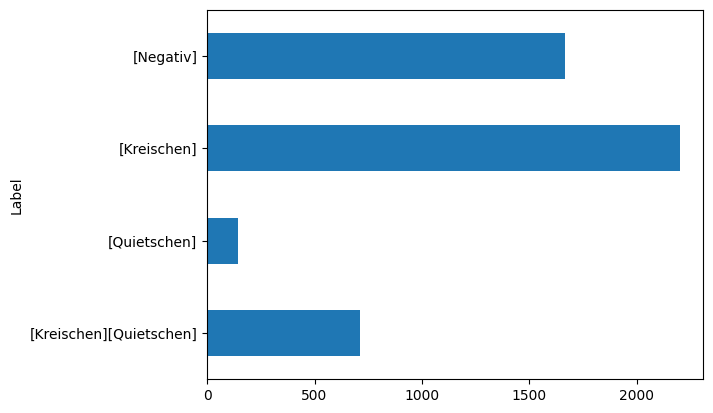

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data_info_df is already defined and includes a 'Label' column

# Define the desired order for the labels
order = ['[Kreischen][Quietschen]', '[Quietschen]', '[Kreischen]', '[Negativ]']

# Calculate the value counts of the 'Label' column
label_counts = data_info_df["Label"].value_counts()

# Reorder the label_counts according to the specified order
# Use reindex to sort the labels as per the order list, filling missing labels with zero if not present
label_counts_sorted = label_counts.reindex(order).fillna(0)

# Plotting the value counts using a horizontal bar chart in the specified order
label_counts_sorted.plot(kind='barh')


plt.show()


./data/labeled_ADSMI/labeled_data_2013-535/2014-06-22_20-07-03_01.WAV


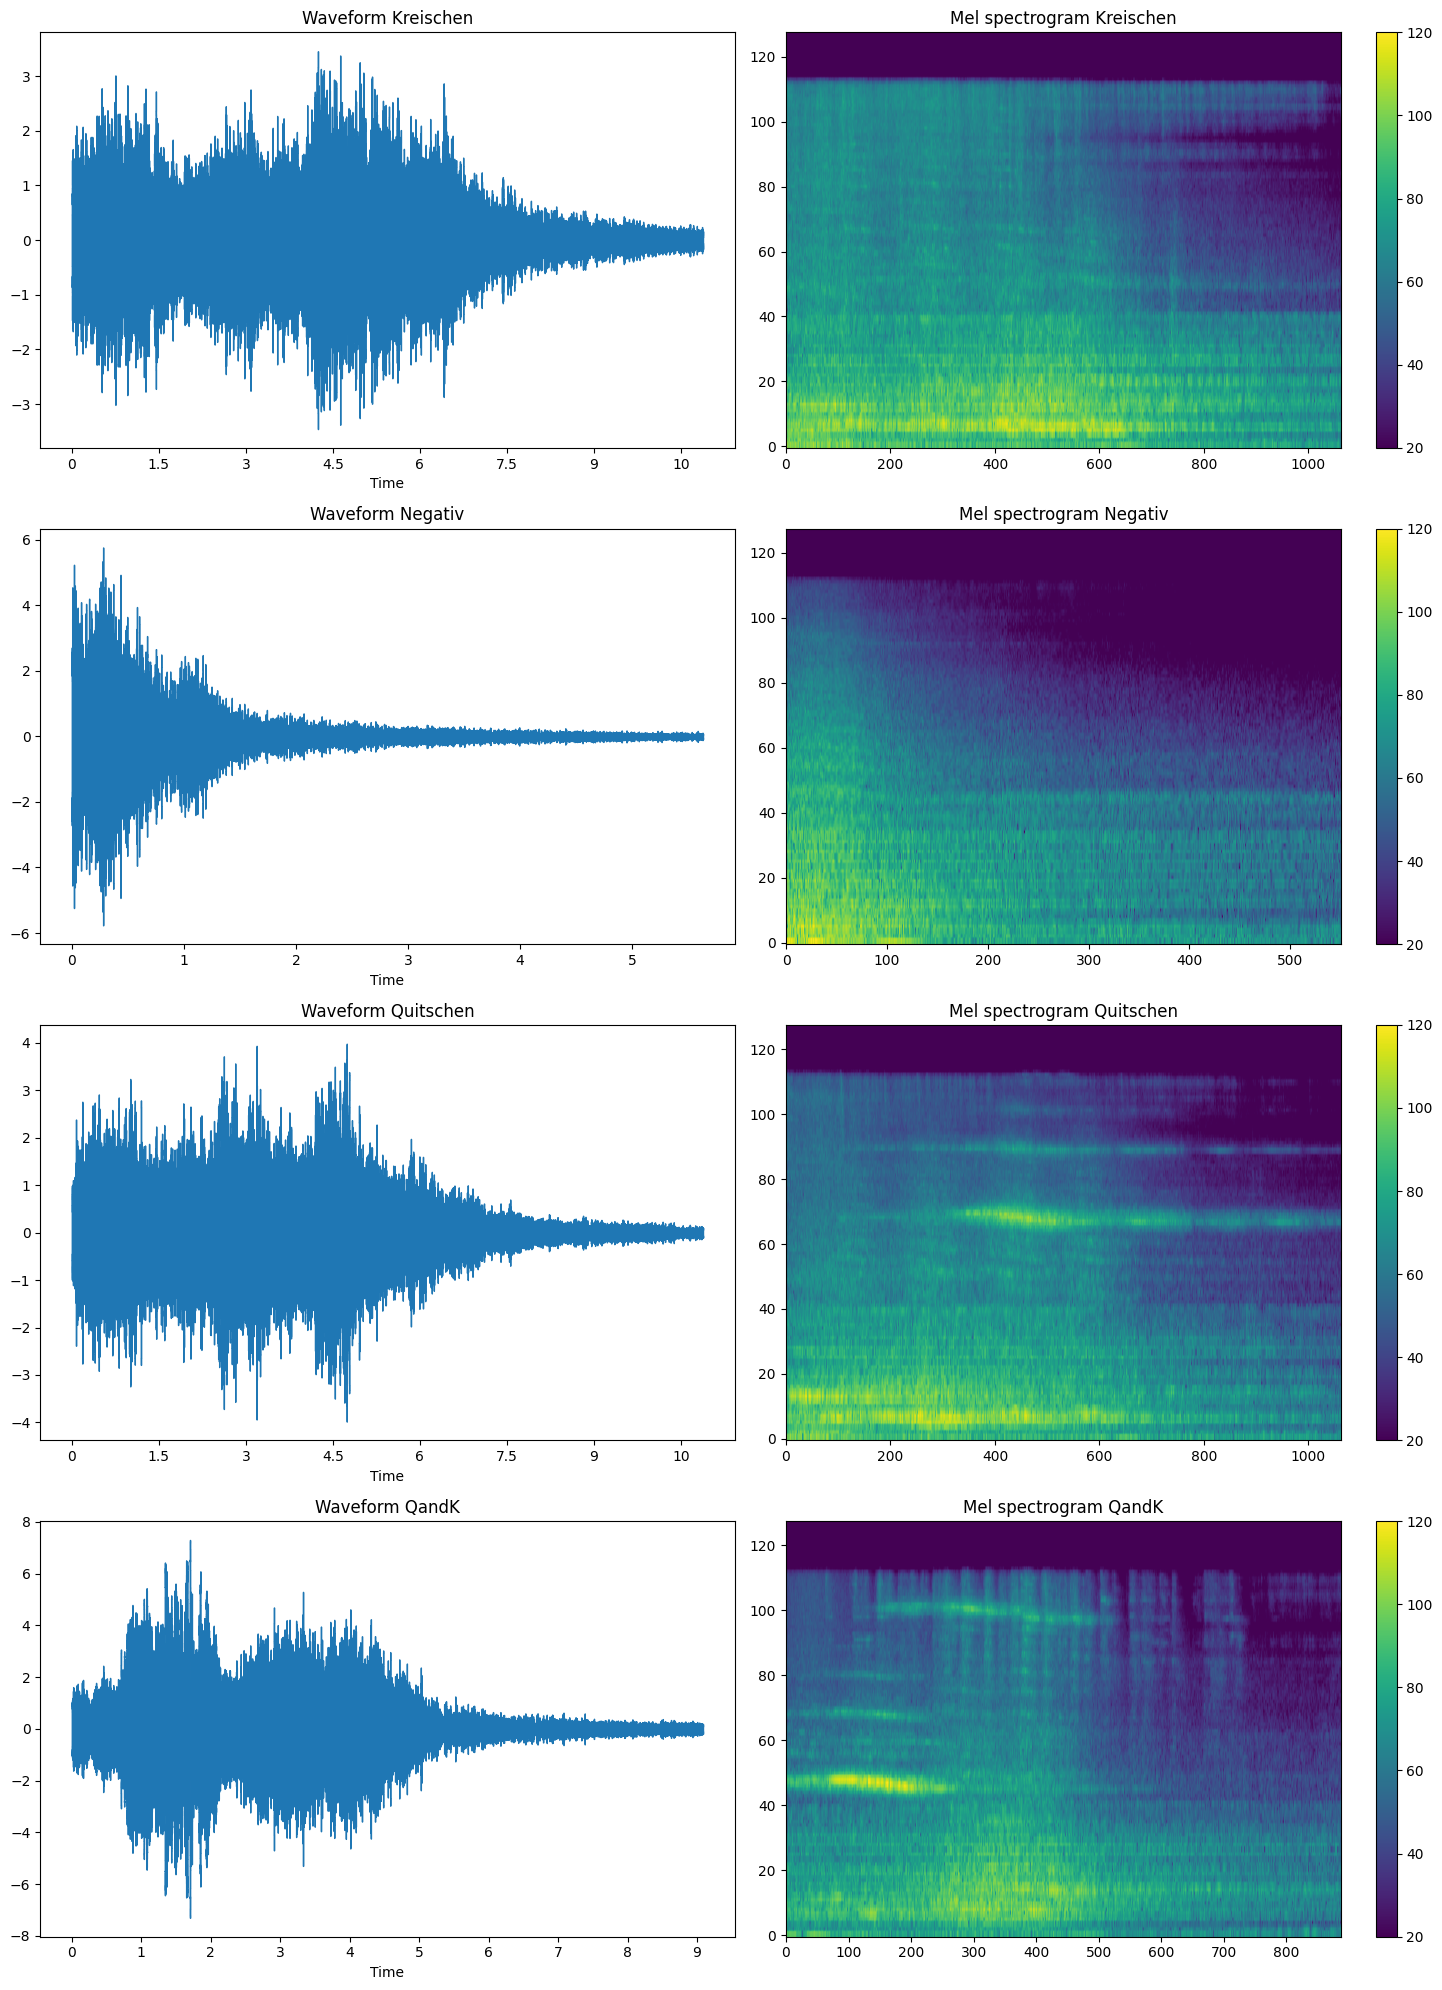

In [35]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

index = random.randint(0, len(Quitschen_df)-1)

def plot_spectrogram_np(spectrogram, ax, title):
    im = ax.imshow(spectrogram, aspect='auto', origin='lower')
    ax.set_title(title)
    plt.colorbar(im, ax=ax)

def plot_waveform(wave, sr, ax, title):
    librosa.display.waveshow(wave, sr=sr, ax=ax)
    ax.set_title(title)

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Kreischen
audio_path_k = kreischen_df["data_path"].iloc[index]
print(audio_path_k)
wave_k, rate_k = librosa.load(audio_path_k, sr=50000)
s_k = librosa.feature.melspectrogram(y=wave_k, sr=rate_k, n_mels=128, n_fft=1024, hop_length=512)
log_s_k = librosa.power_to_db(s_k, ref=np.max)
log_s_k = (log_s_k / 80) * 100 + 120
plot_waveform(wave_k, rate_k, axs[0, 0], "Waveform Kreischen")
plot_spectrogram_np(log_s_k, axs[0, 1], "Mel spectrogram Kreischen")

# Negativ
audio_path_n = Negativ_df["data_path"].iloc[index]
wave_n, rate_n = librosa.load(audio_path_n, sr=50000)
s_n = librosa.feature.melspectrogram(y=wave_n, sr=rate_n, n_mels=128, n_fft=1024, hop_length=512)
log_s_n = librosa.power_to_db(s_n, ref=np.max)
log_s_n = (log_s_n / 80) * 100 + 120
plot_waveform(wave_n, rate_n, axs[1, 0], "Waveform Negativ")
plot_spectrogram_np(log_s_n, axs[1, 1], "Mel spectrogram Negativ")

# Quitschen
audio_path_q = Quitschen_df["data_path"].iloc[index]
wave_q, rate_q = librosa.load(audio_path_q, sr=50000)
s_q = librosa.feature.melspectrogram(y=wave_q, sr=rate_q, n_mels=128, n_fft=1024, hop_length=512)
log_s_q = librosa.power_to_db(s_q, ref=np.max)
log_s_q = (log_s_q / 80) * 100 + 120
plot_waveform(wave_q, rate_q, axs[2, 0], "Waveform Quitschen")
plot_spectrogram_np(log_s_q, axs[2, 1], "Mel spectrogram Quitschen")

# QandK
audio_path_qk = QandK_df["data_path"].iloc[index]
wave_qk, rate_qk = librosa.load(audio_path_qk, sr=50000)
s_qk = librosa.feature.melspectrogram(y=wave_qk, sr=rate_qk, n_mels=128, n_fft=1024, hop_length=512)
log_s_qk = librosa.power_to_db(s_qk, ref=np.max)
log_s_qk = (log_s_qk / 80) * 100 + 120
plot_waveform(wave_qk, rate_qk, axs[3, 0], "Waveform QandK")
plot_spectrogram_np(log_s_qk, axs[3, 1], "Mel spectrogram QandK")

plt.tight_layout()
plt.show()

# Play a sound (e.g., the 'Negativ' sound, but this can be changed)
ipd.Audio(audio_path_n)


In [ ]:
import os
import librosa
import pandas as pd

def get_wav_length(file_path):
    """Return the length of a WAV file in seconds."""
    y, sr = librosa.load(file_path, sr=None)  
    return librosa.get_duration(y=y, sr=sr)

def create_wav_lengths_df(directory):
    """Return a DataFrame with filenames and their lengths for all WAV files in the specified directory."""
    data = []
    for filename in os.listdir(directory):
        if filename.endswith(".WAV"):
            full_path = os.path.join(directory, filename)
            duration = get_wav_length(full_path)
            data.append([filename, duration])
    return pd.DataFrame(data, columns=["filename", "length_in_seconds"])

directory_path = "E:/ADSIM/Import-2023-04/data/2013-535/labeled_data_2013-535/"  


In [ ]:
#save dataframe to csv
#df.to_csv('E:/ADSIM/Import-2023-04/data/2013-535/labeled_data_2013-535/lengths.csv', index=False)
df = pd.read_csv('E:/ADSIM/Import-2023-04/data/2013-535/lengths_labeled.csv')

filename             12.902542
length_in_seconds    12.902542
dtype: float64

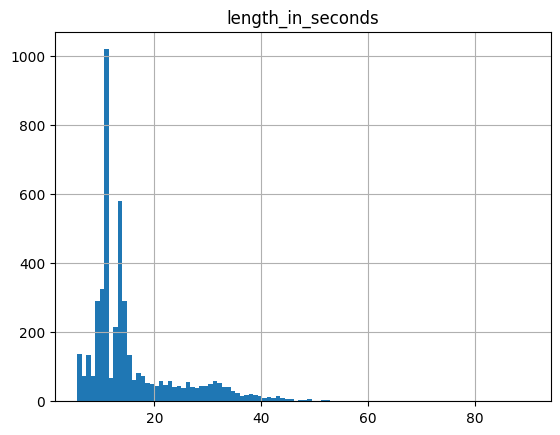

In [ ]:
#make a histogram
df.hist(column='length_in_seconds', bins=100)

#how many percent are over 28 seconds
df[df['length_in_seconds'] > 28].count() / df.count() * 100

In [ ]:
df.describe()
#df["length_in_seconds"].mode()
#combine all dataframes
df_all = pd.concat([df, data_info_df], axis=1)

In [ ]:

summary = df_all.describe()['length_in_seconds'].to_frame()

# Calculating the mode for the 'length_in_seconds' column
mode_df = df_all['length_in_seconds'].mode().to_frame().T
mode_df.index = ['mode']  # Naming the index as 'mode' for clarity
mode_df.columns = summary.columns  # Making sure the columns match

# Concatenating the mode DataFrame with the summary DataFrame
summary = pd.concat([summary, mode_df])

print(summary)

#how much percant is longer than 5 seconds
df_all[df_all['length_in_seconds'] > 15].count() / df_all.count() * 100


       length_in_seconds
count        4720.000000
mean           16.116939
std             9.477360
min             5.568000
25%            10.880000
50%            13.184000
75%            17.920000
max            90.000000
mode           10.880000


filename             31.504237
length_in_seconds    31.504237
campaign             31.504237
ID                   31.504237
Label                31.504237
data                 31.504237
dtype: float64

In [ ]:
# Assuming df_all is your initial DataFrame and it's already defined
df_quitschen = df_all.loc[df_all['Label'] == '[Quietschen]']

# Getting the summary statistics for the 'length_in_seconds' column
summary = df_quitschen.describe()['length_in_seconds'].to_frame()

# Calculating the mode for the 'length_in_seconds' column
mode_df = df_quitschen['length_in_seconds'].mode().to_frame().T
mode_df.index = ['mode']  # Naming the index as 'mode' for clarity
mode_df.columns = summary.columns  # Making sure the columns match

# Concatenating the mode DataFrame with the summary DataFrame
summary = pd.concat([summary, mode_df])

print(summary)

#how much percant is longer than 5 seconds
df_quitschen[df_quitschen['length_in_seconds'] > 15].count() / df_quitschen.count() * 100


       length_in_seconds
count         142.000000
mean           16.276732
std             7.912390
min             5.760000
25%            10.880000
50%            14.400000
75%            18.544000
max            44.288000
mode           10.880000


filename             43.661972
length_in_seconds    43.661972
campaign             43.661972
ID                   43.661972
Label                43.661972
data                 43.661972
dtype: float64

In [ ]:
df_all["length_in_seconds"].mode()

0    10.88
Name: length_in_seconds, dtype: float64

In [ ]:
df_all[df_all['length_in_seconds']==10.88]["Label"].value_counts()

Label
[Kreischen]                349
[Negativ]                  272
[Kreischen][Quietschen]     96
[Quietschen]                13
Name: count, dtype: int64

In [ ]:
distri_df = df_all["Label"].value_counts()




array([[<Axes: title={'center': 'length_in_seconds'}>]], dtype=object)

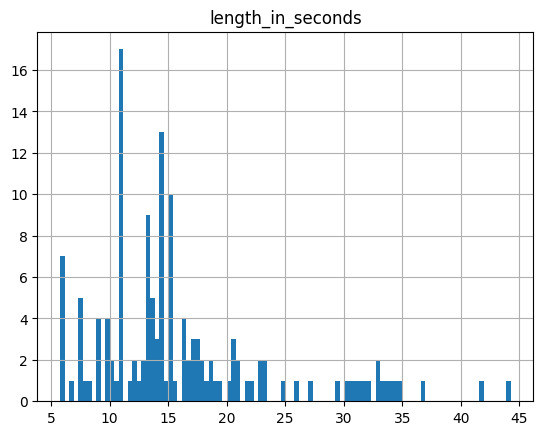

In [ ]:
df_all[df_all['Label']=="[Quietschen]"]["length_in_seconds"].describe()

#histogram of all data
df_all[df_all['Label']=="[Quietschen]"].hist(column='length_in_seconds', bins=100)